In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind

sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize': (14, 4)}
)
%matplotlib inline

In [2]:
df = pd.read_csv('stud_math.csv')

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


В датасете присутсвуют:
    1. Количественные переменные - 3: age, absences, score
    2. Качественные переменные - 26: school, sex, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian,
                                  traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery,
                                  higher, internet, romantic, famrel, freetime, goout, health
    3. Неизвестная переменная - 1: studytime, granular

## Функции для обработки

In [4]:
def boxplot(col):
    # Выводит для столбца боксплот
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score', data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)
    plt.show()


def search_outliers(col):
    # Считает для каждого стобца границы выбросов
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    print(
        f'Границы выбросов в столбце {col} - [{df[col].quantile(0.25)-1.5*IQR}; {df[col].quantile(0.75)+1.5*IQR}]')


def missing_values(col):
    # Показывает кол-во и процент пропущенных значений
    missing_value_percent = round(df[col].isnull().mean()*100, 2)
    print(
        f'Процент пропущенных значений в столбце {col} - {missing_value_percent}%')
    print(
        f'Всего пропущенных значений в столбце {col} - {df[col].isnull().sum()}')


def info_col(col):
    # Показывает количество уникальных значений, колличество для каждого значения, информацию о столбце
    display(df[col].unique())
    display(pd.DataFrame(df[col].value_counts()))
    display(df.loc[:, [col]].describe())


def nan_median(col):
    # Замена пропущенных значений на медиану
    df[col] = df[col].fillna(df[col].median())


def nan_mode(col):
    # Замена пропущенных значений на моду
    df[col] = df[col].fillna(df[col].mode()[0])


def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

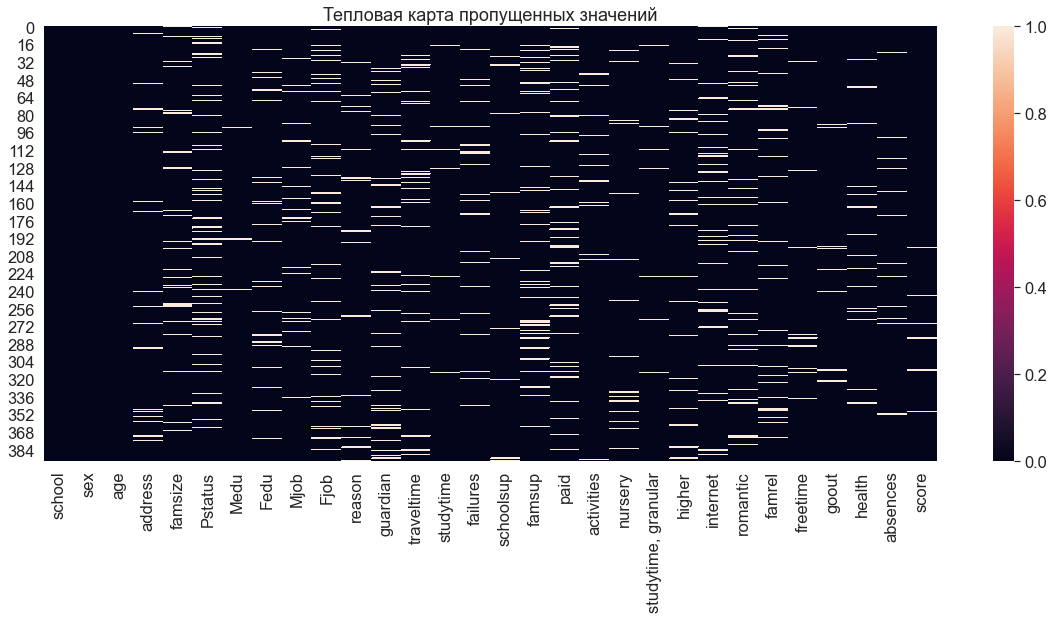

Процент пропущенных значений в столбце school - 0.0%
Процент пропущенных значений в столбце sex - 0.0%
Процент пропущенных значений в столбце age - 0.0%
Процент пропущенных значений в столбце address - 4.3%
Процент пропущенных значений в столбце famsize - 6.84%
Процент пропущенных значений в столбце Pstatus - 11.39%
Процент пропущенных значений в столбце Medu - 0.76%
Процент пропущенных значений в столбце Fedu - 6.08%
Процент пропущенных значений в столбце Mjob - 4.81%
Процент пропущенных значений в столбце Fjob - 9.11%
Процент пропущенных значений в столбце reason - 4.3%
Процент пропущенных значений в столбце guardian - 7.85%
Процент пропущенных значений в столбце traveltime - 7.09%
Процент пропущенных значений в столбце studytime - 1.77%
Процент пропущенных значений в столбце failures - 5.57%
Процент пропущенных значений в столбце schoolsup - 2.28%
Процент пропущенных значений в столбце famsup - 9.87%
Процент пропущенных значений в столбце paid - 10.13%
Процент пропущенных значений в

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df.isnull(), ax=ax)
ax.set_title('Тепловая карта пропущенных значений')
plt.show()


for i in df.columns:
    missing_value_percent = round(df[i].isnull().mean()*100, 2)
    print(
        f'Процент пропущенных значений в столбце {i} - {missing_value_percent}%')

# Проведем предварительный анализ для каждого столбца

In [6]:
col = 'score'
info_col(col)
print('\t')
missing_values(col)
print('\t')
search_outliers(col)

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


,score
count,389.000000
mean,52.262211
std,22.919022
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


	
Процент пропущенных значений в столбце score - 1.52%
Всего пропущенных значений в столбце score - 6
	
Границы выбросов в столбце score - [-5.0; 115.0]


In [7]:
df.dropna(subset=['score'], inplace=True)

Вывод:
    1. Пропущенных значений - 6.
    2. Удалим пропущенные значения из предсказываемой переменной
    3. Со значением 0 нужно разбираться. Это может быть ошибкой при заполнении, либо пропущенные значения отмечались 0. Вероятность
       получить 0 за экзамен конечно существует, но этих значений слишком много. В slack я прочитал, что исключать 0 мы пока не 
       имеем право, так как нет достаточных оснований.

In [8]:
col = 'age'
info_col(col)
print('\t')
missing_values(col)
print('\t')
search_outliers(col)

array([18, 17, 15, 16, 19, 22, 20, 21])

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


,age
count,389.000000
mean,16.673522
std,1.265662
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


	
Процент пропущенных значений в столбце age - 0.0%
Всего пропущенных значений в столбце age - 0
	
Границы выбросов в столбце age - [13.0; 21.0]


In [9]:
df = df.query("age != 22")   # Исключили выбросы

Вывод: 
    1. Пропущенных значений нет.
    2. Мы обнаружили выброс. По логике, ученика в возрасте 22 года не может быть в школе. Поэтому его следует исключить.

In [10]:
col = 'school'
info_col(col)
print('\t')
missing_values(col)

array(['GP', 'MS'], dtype=object)

,school
GP,343
MS,45


,school
count,388
unique,2
top,GP
freq,343


	
Процент пропущенных значений в столбце school - 0.0%
Всего пропущенных значений в столбце school - 0


Вывод:
    1. Пропущенных значений нет.
    2. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [11]:
col = 'absences'
info_col(col)
print('\t')
missing_values(col)
print('\t')
search_outliers(col)

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


,absences
count,377.000000
mean,7.297082
std,23.642659
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


	
Процент пропущенных значений в столбце absences - 2.84%
Всего пропущенных значений в столбце absences - 11
	
Границы выбросов в столбце absences - [-12.0; 20.0]


In [12]:
df = df.query("absences not in [385, 212]")   # Исключили выбросы
nan_median(col)

Вывод: 
    1. Пропущенных значений - 12.
    2. Заменим пропущенные значения на медиану.
    3. Мы обнаружили выбросы. Для удаления выбросов нам нужно больше информации (число занятий за год, число занятий при котором 
       ученики не допускаются к экзамену). Посмотрел в интернете, что в среднем в школе 170 часов математики в год (это в России). 
       Исходя из этих данных, значения 385 и 212 мы можем исключить. Остальные значения мы не можем исключить, так как нет на это
       оснований.

In [13]:
col = 'sex'
info_col(col)
print('\t')
missing_values(col)

array(['F', 'M'], dtype=object)

,sex
F,203
M,183


,sex
count,386
unique,2
top,F
freq,203


	
Процент пропущенных значений в столбце sex - 0.0%
Всего пропущенных значений в столбце sex - 0


Вывод:
    1. Пропущенных значений нет.
    2. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [14]:
col = 'address'
info_col(col)
print('\t')
missing_values(col)

array(['U', nan, 'R'], dtype=object)

,address
U,288
R,83


,address
count,371
unique,2
top,U
freq,288


	
Процент пропущенных значений в столбце address - 3.89%
Всего пропущенных значений в столбце address - 15


In [15]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 17.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [16]:
col = 'famsize'
info_col(col)
print('\t')
missing_values(col)

array([nan, 'GT3', 'LE3'], dtype=object)

,famsize
GT3,253
LE3,106


,famsize
count,359
unique,2
top,GT3
freq,253


	
Процент пропущенных значений в столбце famsize - 6.99%
Всего пропущенных значений в столбце famsize - 27


In [17]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 27.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [18]:
col = 'Pstatus'
info_col(col)
print('\t')
missing_values(col)

array(['A', nan, 'T'], dtype=object)

,Pstatus
T,306
A,35


,Pstatus
count,341
unique,2
top,T
freq,306


	
Процент пропущенных значений в столбце Pstatus - 11.66%
Всего пропущенных значений в столбце Pstatus - 45


In [19]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 45.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [20]:
col = 'Medu'
info_col(col)
print('\t')
missing_values(col)

array([ 4.,  1.,  3.,  2., nan,  0.])

,Medu
4.0,131
2.0,98
3.0,95
1.0,56
0.0,3


,Medu
count,383.000000
mean,2.770235
std,1.097094
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


	
Процент пропущенных значений в столбце Medu - 0.78%
Всего пропущенных значений в столбце Medu - 3


In [21]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 45.
    2. Заменим их на моду.
    3. Всего у нас 5 уникальных значения, что соответсвует описанию.

In [22]:
col = 'Fedu'
info_col(col)
print('\t')
missing_values(col)

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

,Fedu
2.0,104
3.0,93
4.0,88
1.0,74
0.0,2
40.0,1


,Fedu
count,362.000000
mean,2.632597
std,2.249121
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,40.000000


	
Процент пропущенных значений в столбце Fedu - 6.22%
Всего пропущенных значений в столбце Fedu - 24


In [23]:
df.Fedu = df.Fedu.replace(40, 4)

In [24]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 24.
    2. Заменим их на моду.
    3. Всего у нас 5 уникальных значения, что не соответсвует описанию. Значение 40 заменим на 4, так как вероятнее всего это ошибка
       при заполнении.

In [25]:
col = 'Mjob'
info_col(col)
print('\t')
missing_values(col)

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

,Mjob
other,127
services,95
at_home,58
teacher,55
health,32


,Mjob
count,367
unique,5
top,other
freq,127


	
Процент пропущенных значений в столбце Mjob - 4.92%
Всего пропущенных значений в столбце Mjob - 19


In [26]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 19.
    2. Заменим их на моду.
    3. Всего у нас 5 уникальных значения, что соответсвует описанию.

In [27]:
col = 'Fjob'
info_col(col)
print('\t')
missing_values(col)

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

,Fjob
other,194
services,97
teacher,28
at_home,16
health,15


,Fjob
count,350
unique,5
top,other
freq,194


	
Процент пропущенных значений в столбце Fjob - 9.33%
Всего пропущенных значений в столбце Fjob - 36


In [28]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 36.
    2. Заменим их на моду.
    3. Всего у нас 5 уникальных значения, что соответсвует описанию.

In [29]:
col = 'reason'
info_col(col)
print('\t')
missing_values(col)

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

,reason
course,134
reputation,102
home,101
other,32


,reason
count,369
unique,4
top,course
freq,134


	
Процент пропущенных значений в столбце reason - 4.4%
Всего пропущенных значений в столбце reason - 17


In [30]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 17.
    2. Заменим их на моду.
    3. Всего у нас 4 уникальных значения, что соответсвует описанию.

In [31]:
col = 'guardian'
info_col(col)
print('\t')
missing_values(col)

array(['mother', 'father', 'other', nan], dtype=object)

,guardian
mother,246
father,86
other,24


,guardian
count,356
unique,3
top,mother
freq,246


	
Процент пропущенных значений в столбце guardian - 7.77%
Всего пропущенных значений в столбце guardian - 30


In [32]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 30.
    2. Заменим их на моду.
    3. Всего у нас 3 уникальных значения, что соответсвует описанию.

In [33]:
col = 'traveltime'
info_col(col)
print('\t')
missing_values(col)

array([ 2.,  1.,  3., nan,  4.])

,traveltime
1.0,236
2.0,94
3.0,21
4.0,7


,traveltime
count,358.000000
mean,1.438547
std,0.694412
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


	
Процент пропущенных значений в столбце traveltime - 7.25%
Всего пропущенных значений в столбце traveltime - 28


In [34]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 28.
    2. Заменим их на моду.
    3. Всего у нас 4 уникальных значения, что соответсвует описанию.

In [35]:
col = 'studytime'
info_col(col)
print('\t')
missing_values(col)

array([ 2.,  3.,  1., nan,  4.])

,studytime
2.0,187
1.0,102
3.0,63
4.0,27


,studytime
count,379.000000
mean,2.039578
std,0.848912
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


	
Процент пропущенных значений в столбце studytime - 1.81%
Всего пропущенных значений в столбце studytime - 7


In [36]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 7.
    2. Заменим их на моду.
    3. Всего у нас 4 уникальных значения, что соответсвует описанию.

In [37]:
col = 'failures'
info_col(col)
print('\t')
missing_values(col)

array([ 0.,  3., nan,  2.,  1.])

,failures
0.0,289
1.0,48
2.0,14
3.0,13


,failures
count,364.000000
mean,0.315934
std,0.713250
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


	
Процент пропущенных значений в столбце failures - 5.7%
Всего пропущенных значений в столбце failures - 22


In [38]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 22.
    2. Заменим их на моду.
    3. Всего у нас 4 уникальных значения, что соответсвует описанию.

In [39]:
col = 'schoolsup'
info_col(col)
print('\t')
missing_values(col)

array(['yes', 'no', nan], dtype=object)

,schoolsup
no,329
yes,48


,schoolsup
count,377
unique,2
top,no
freq,329


	
Процент пропущенных значений в столбце schoolsup - 2.33%
Всего пропущенных значений в столбце schoolsup - 9


In [40]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 9.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [41]:
col = 'famsup'
info_col(col)
print('\t')
missing_values(col)

array(['no', 'yes', nan], dtype=object)

,famsup
yes,215
no,134


,famsup
count,349
unique,2
top,yes
freq,215


	
Процент пропущенных значений в столбце famsup - 9.59%
Всего пропущенных значений в столбце famsup - 37


In [42]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 38.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [43]:
col = 'paid'
info_col(col)
print('\t')
missing_values(col)

array(['no', nan, 'yes'], dtype=object)

,paid
no,195
yes,152


,paid
count,347
unique,2
top,no
freq,195


	
Процент пропущенных значений в столбце paid - 10.1%
Всего пропущенных значений в столбце paid - 39


In [44]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 40.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [45]:
col = 'activities'
info_col(col)
print('\t')
missing_values(col)

array(['no', 'yes', nan], dtype=object)

,activities
yes,192
no,180


,activities
count,372
unique,2
top,yes
freq,192


	
Процент пропущенных значений в столбце activities - 3.63%
Всего пропущенных значений в столбце activities - 14


In [46]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 14.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [47]:
col = 'nursery'
info_col(col)
print('\t')
missing_values(col)

array(['yes', 'no', nan], dtype=object)

,nursery
yes,295
no,76


,nursery
count,371
unique,2
top,yes
freq,295


	
Процент пропущенных значений в столбце nursery - 3.89%
Всего пропущенных значений в столбце nursery - 15


In [48]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 16.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [49]:
col = 'higher'
info_col(col)
print('\t')
missing_values(col)

array(['yes', nan, 'no'], dtype=object)

,higher
yes,348
no,18


,higher
count,366
unique,2
top,yes
freq,348


	
Процент пропущенных значений в столбце higher - 5.18%
Всего пропущенных значений в столбце higher - 20


In [50]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 20.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [51]:
col = 'internet'
info_col(col)
print('\t')
missing_values(col)

array([nan, 'yes', 'no'], dtype=object)

,internet
yes,298
no,54


,internet
count,352
unique,2
top,yes
freq,298


	
Процент пропущенных значений в столбце internet - 8.81%
Всего пропущенных значений в столбце internet - 34


In [52]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 34.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [53]:
col = 'romantic'
info_col(col)
print('\t')
missing_values(col)

array(['no', nan, 'yes'], dtype=object)

,romantic
no,233
yes,122


,romantic
count,355
unique,2
top,no
freq,233


	
Процент пропущенных значений в столбце romantic - 8.03%
Всего пропущенных значений в столбце romantic - 31


In [54]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 31.
    2. Заменим их на моду.
    3. Всего у нас 2 уникальных значения, что соответсвует описанию.

In [55]:
col = 'famrel'
info_col(col)
print('\t')
missing_values(col)

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

,famrel
4.0,178
5.0,95
3.0,62
2.0,16
1.0,7
-1.0,1


,famrel
count,359.000000
mean,3.930362
std,0.926426
min,-1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


	
Процент пропущенных значений в столбце famrel - 6.99%
Всего пропущенных значений в столбце famrel - 27


In [56]:
df.famrel = df.famrel.replace(-1, 1)

In [57]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 27.
    2. Заменим их на моду.
    3. Всего у нас 6 уникальных значения, что не соответсвует описанию. Значение -1 заменим на 1, так как вероятнее всего это ошибка
       при заполнении.

In [58]:
col = 'freetime'
info_col(col)
print('\t')
missing_values(col)

array([ 3.,  2.,  4.,  1.,  5., nan])

,freetime
3.0,151
4.0,109
2.0,63
5.0,36
1.0,18


,freetime
count,377.000000
mean,3.217507
std,0.992210
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


	
Процент пропущенных значений в столбце freetime - 2.33%
Всего пропущенных значений в столбце freetime - 9


In [59]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 11.
    2. Заменим их на моду.
    3. Всего у нас 5 уникальных значения, что соответсвует описанию.

In [60]:
col = 'goout'
info_col(col)
print('\t')
missing_values(col)

array([ 4.,  3.,  2.,  1.,  5., nan])

,goout
3.0,126
2.0,101
4.0,80
5.0,50
1.0,22


,goout
count,379.000000
mean,3.092348
std,1.110041
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


	
Процент пропущенных значений в столбце goout - 1.81%
Всего пропущенных значений в столбце goout - 7


In [61]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 8.
    2. Заменим их на моду.
    3. Всего у нас 5 уникальных значения, что соответсвует описанию.

In [62]:
col = 'health'
info_col(col)
print('\t')
missing_values(col)

array([ 3.,  5.,  1.,  2.,  4., nan])

,health
5.0,137
3.0,87
4.0,59
1.0,46
2.0,42


,health
count,371.000000
mean,3.536388
std,1.401022
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


	
Процент пропущенных значений в столбце health - 3.89%
Всего пропущенных значений в столбце health - 15


In [63]:
nan_mode(col)

Вывод:
    1. Пропущенных значений - 15.
    2. Заменим их на моду.
    3. Всего у нас 5 уникальных значения, что соответсвует описанию.

In [64]:
# Разберемся со столобцом studytime, granular
df.corr()  # как видно из матрицы studytime, granular очень сильно коррелирует с studytime

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.149172,-0.129315,0.088809,-0.004504,0.157568,0.004600,0.034035,-0.007612,0.098281,-0.045971,0.159783,-0.151255
Medu,-0.149172,1.000000,0.586671,-0.158404,0.076772,-0.243426,-0.077346,-0.005611,0.043532,0.068180,-0.070118,0.093243,0.204122
Fedu,-0.129315,0.586671,1.000000,-0.109937,0.007267,-0.251012,-0.007274,-0.007023,-0.017445,0.056680,-0.021793,0.036296,0.121524
traveltime,0.088809,-0.158404,-0.109937,1.000000,-0.100608,0.045225,0.101783,-0.029236,-0.013084,0.047916,-0.038617,0.001908,-0.055894
studytime,-0.004504,0.076772,0.007267,-0.100608,1.000000,-0.161692,-1.000000,0.042198,-0.120185,-0.048733,-0.070238,-0.060250,0.113300
failures,0.157568,-0.243426,-0.251012,0.045225,-0.161692,1.000000,0.163220,-0.052055,0.070592,0.079924,0.097801,0.050319,-0.338417
"studytime, granular",0.004600,-0.077346,-0.007274,0.101783,-1.000000,0.163220,1.000000,-0.042777,0.121999,0.049204,0.070802,0.060395,-0.114791
famrel,0.034035,-0.005611,-0.007023,-0.029236,0.042198,-0.052055,-0.042777,1.000000,0.157831,0.051782,0.097138,-0.046548,0.064570
freetime,-0.007612,0.043532,-0.017445,-0.013084,-0.120185,0.070592,0.121999,0.157831,1.000000,0.290180,0.070516,-0.072636,0.021043
goout,0.098281,0.068180,0.056680,0.047916,-0.048733,0.079924,0.049204,0.051782,0.290180,1.000000,-0.009706,0.029663,-0.119217


In [65]:
df[['studytime, granular', 'studytime']]

,"studytime, granular",studytime
0,-6.0,2.0
1,-6.0,2.0
2,-6.0,2.0
3,-9.0,3.0
4,-6.0,2.0
...,...,...
389,-6.0,2.0
391,-3.0,1.0
392,-3.0,1.0
393,-3.0,1.0


In [66]:
df.drop('studytime, granular', axis=1, inplace=True)

Вывод:
    Наблюдается практически 100% корреляция между столбцами studytime, granular и studytime. 
    studytime, granular это тот же самый столбец, что и studytime только при этом умноженный на -3.
    Поэтому мы можем не учитывать стобец studytime, granular в нашем анализе.

# Корреляционный анализ количественных переменных

In [67]:
df[['score', 'age', 'absences']].corr()

,score,age,absences
score,1.000000,-0.151255,0.030767
age,-0.151255,1.000000,0.159783
absences,0.030767,0.159783,1.000000


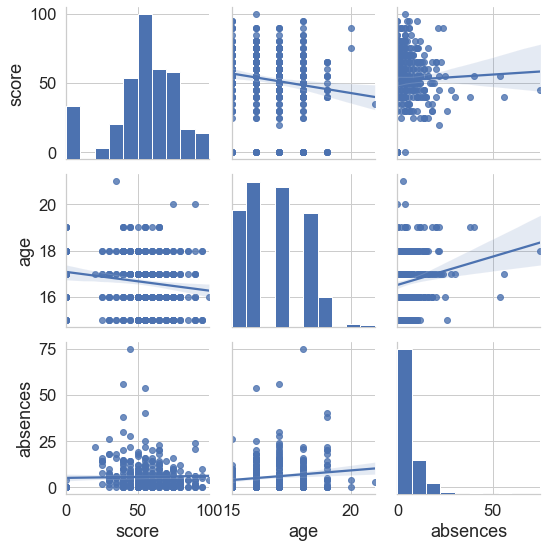

In [68]:
sns.pairplot(df[['score', 'age', 'absences']], kind='reg')

Вывод:
    Сильной корреляции не наблюдается между переменными не наблюдается, поэтому age и absences оставляем.

# Анализ категориальных переменных

In [69]:
colums = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
          'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
          'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

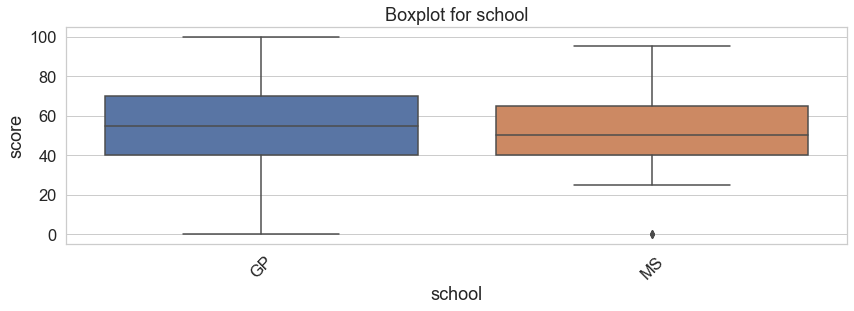

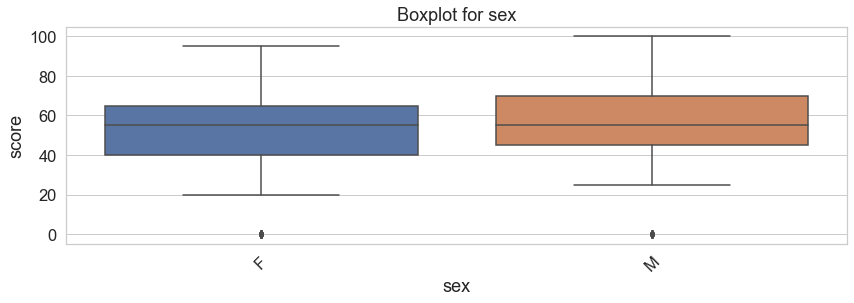

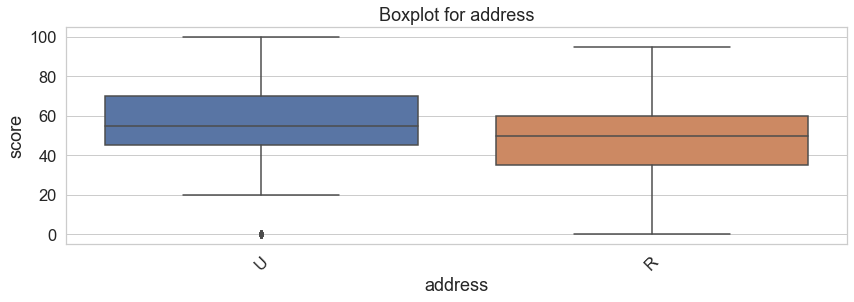

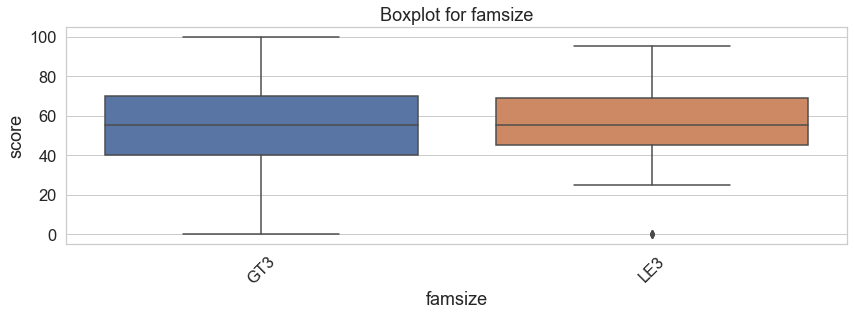

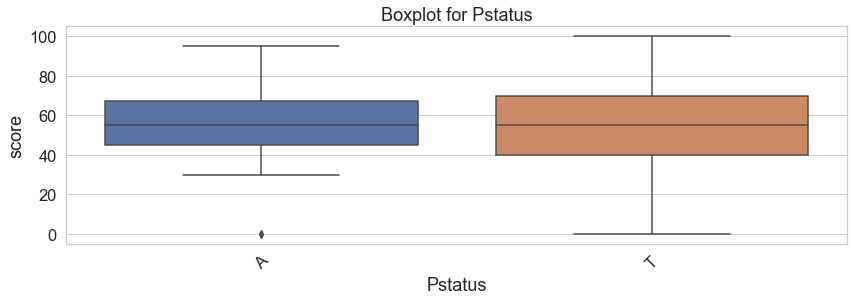

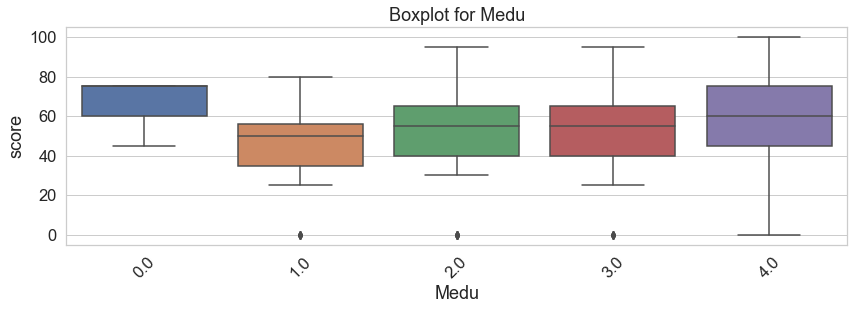

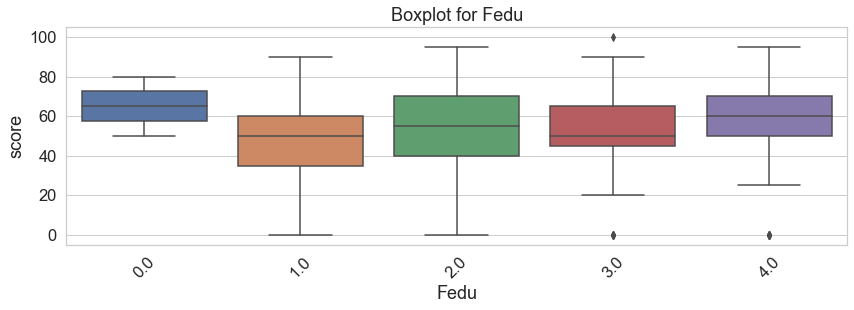

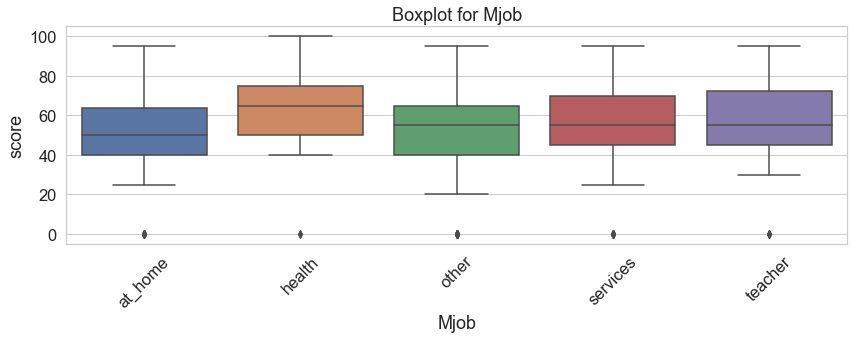

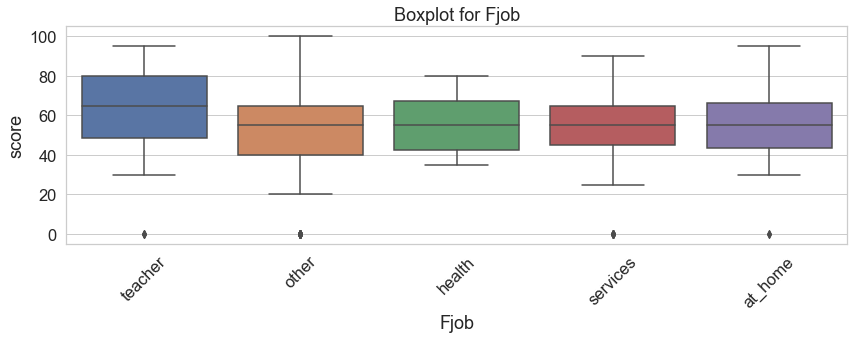

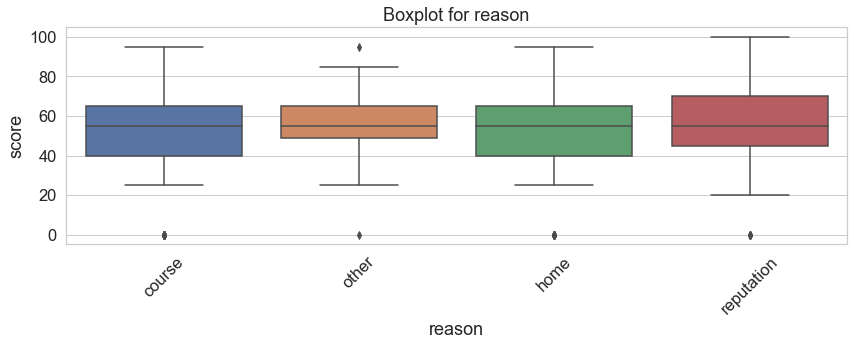

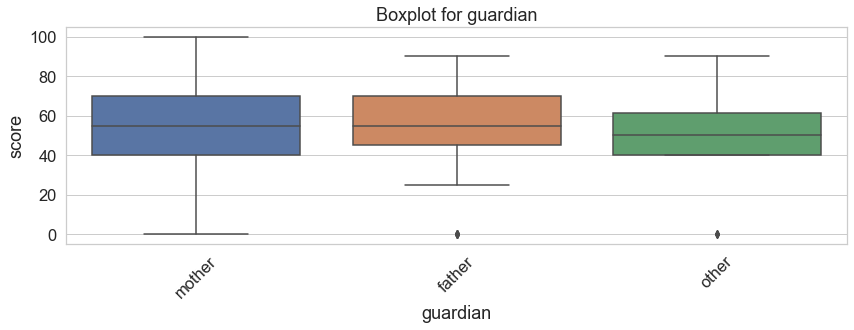

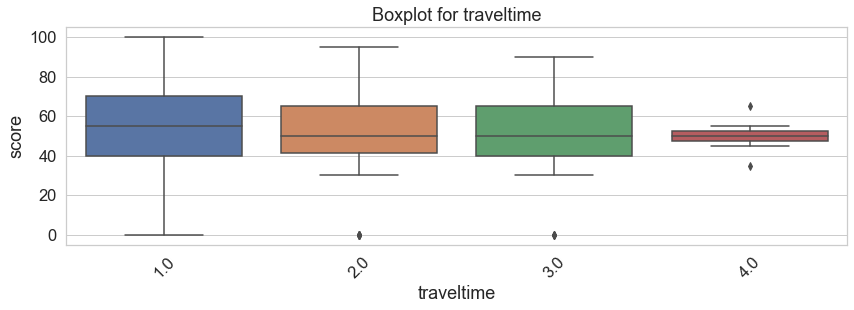

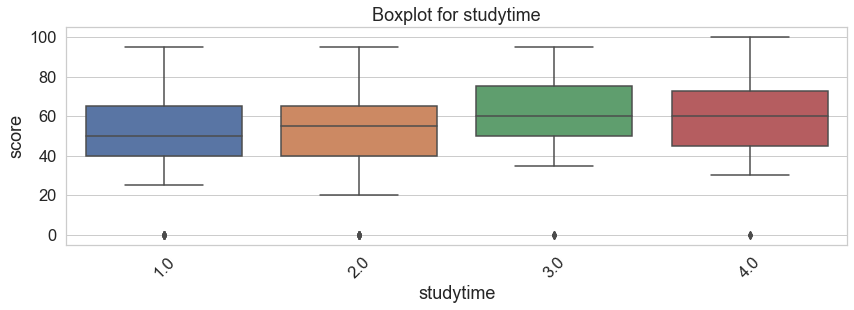

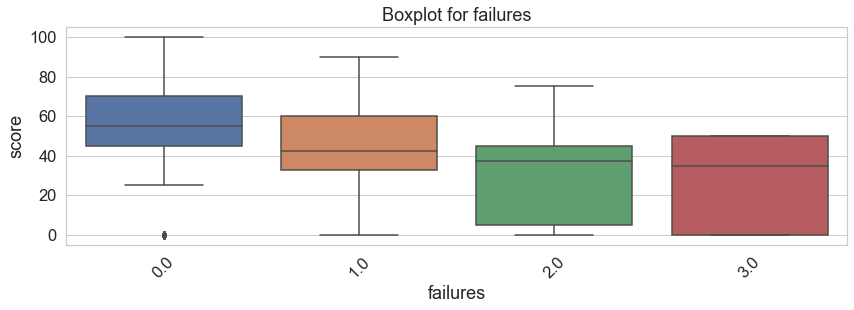

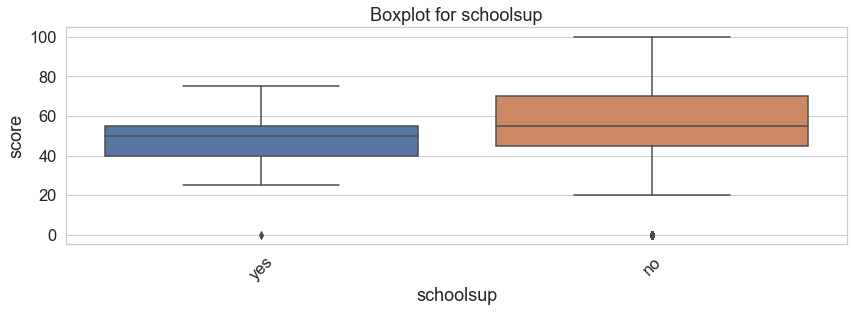

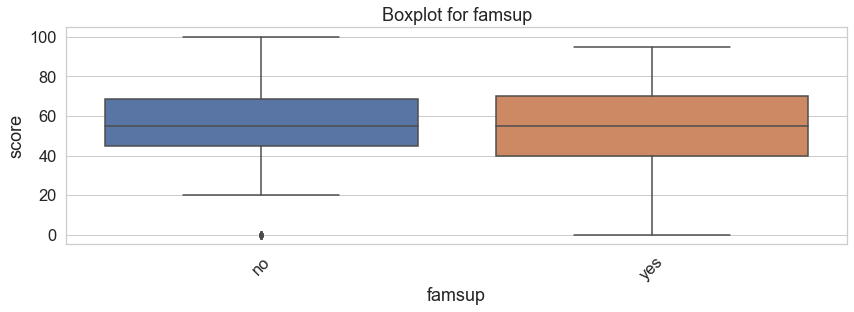

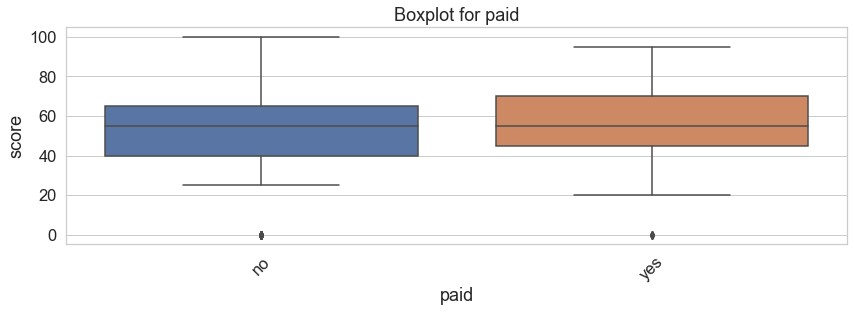

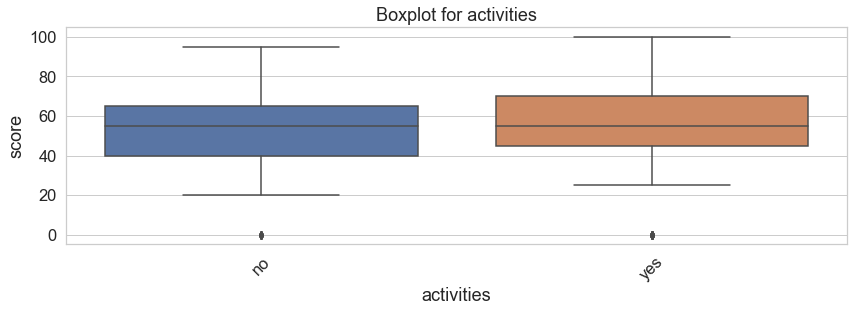

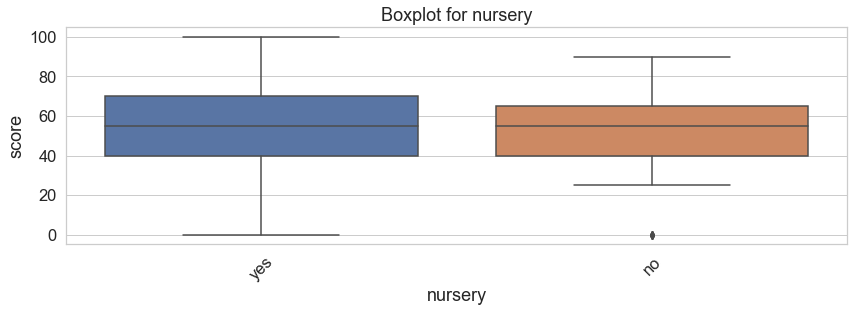

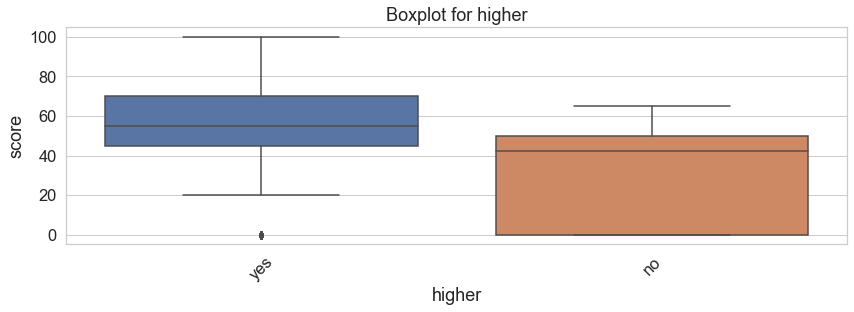

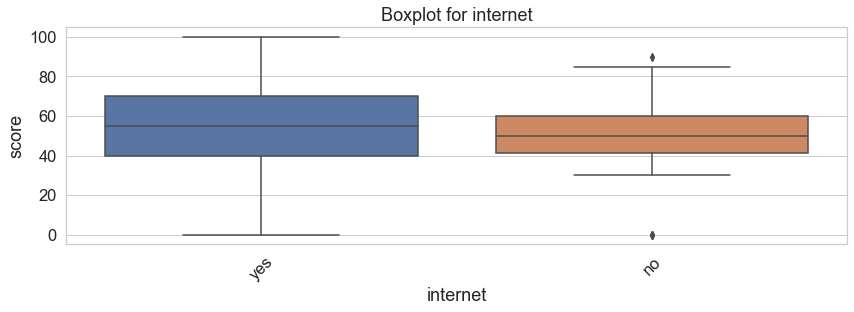

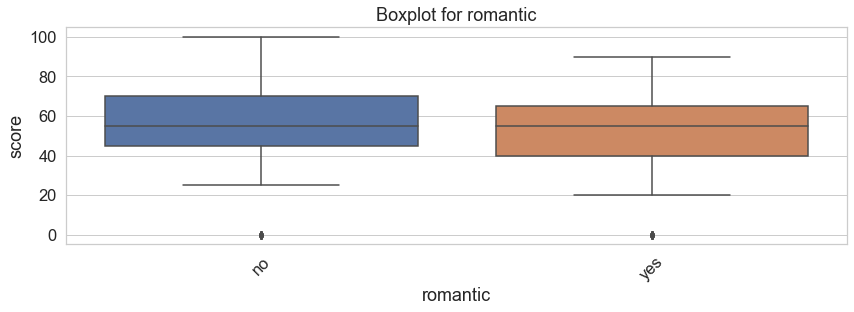

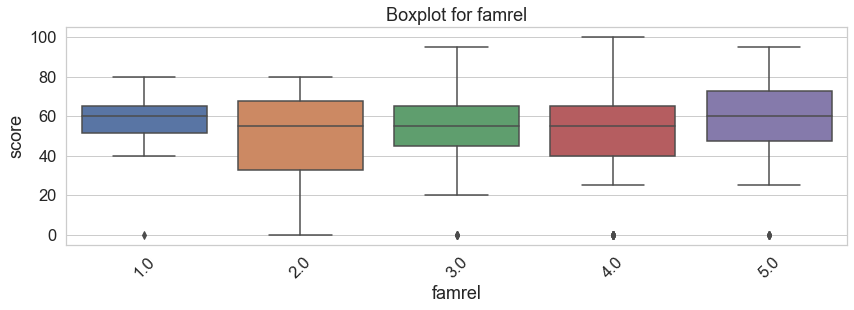

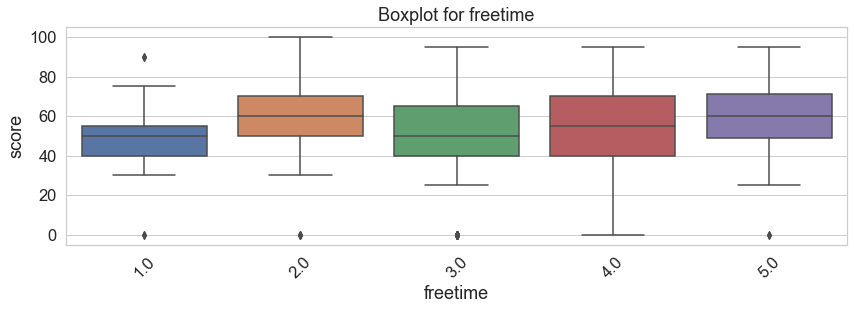

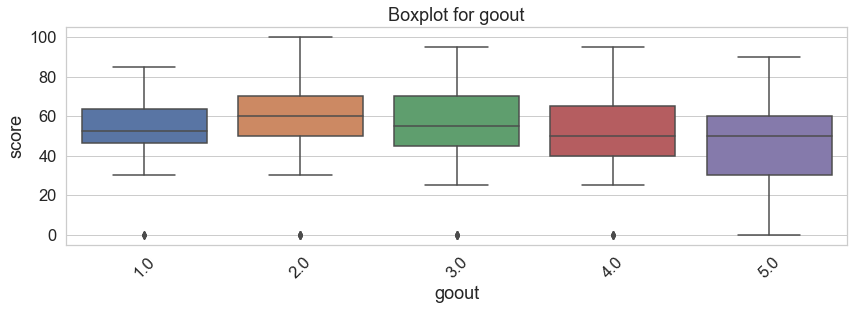

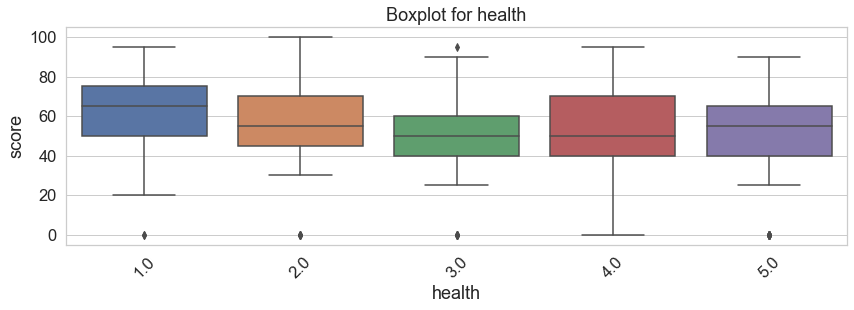

In [70]:
for col in colums:
    boxplot(col)

Выводы:
    Из графиков видно, что практически везде значение score=0 является выбросом. Я бы для анализа использовал бы Критерий 
    Краскела — Уоллиса (там где больше 2) или U-критерий Манна — Уитни (там где 2) из-за наличия выбросов. Но так как мы это еще 
    не проходили, я пока воздержусь.

In [71]:
for col in colums:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Выводы

В результате предварительного анализа мы пришли к следующим выводам:
    1. В данных достаточно мало пустых значений.
    2. Выбросы найдены только в столбцах с возрастом и в количестве пропущенных занятий, что позволяет сделать вывод о том, что 
       данные достаточно чистые. При анализе категориальных переменных практически везде значение score=0 является выбросом.
       Ниже посмотрю, что будет если исключить 0.
    3. Столбец studytime, granular практически 100% коррелировал с studytime. studytime, granular удалили из анализа.
    4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 
       age, absences, sex, address, Medu, Mjob, failures, paid, higher и romantic.

# Попробовал, что будет если исключить 0 из score

In [72]:
df1 = df

In [73]:
df1 = df.query('score!=0')

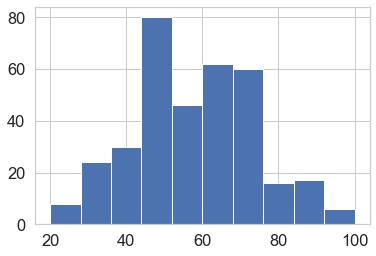

In [74]:
df1.score.hist()

In [75]:
def boxplot111(col):
    # Выводит для столбца боксплот
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score', data=df1,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)
    plt.show()

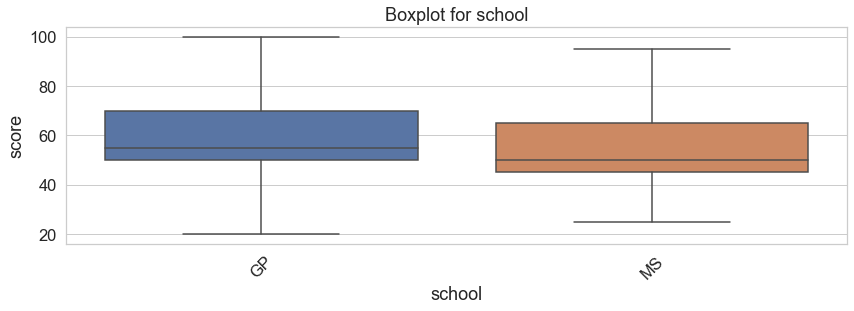

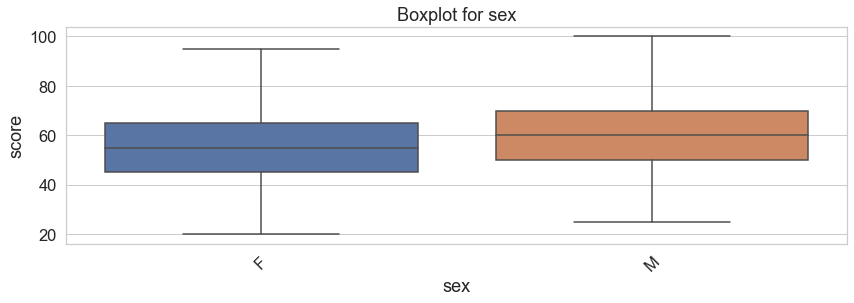

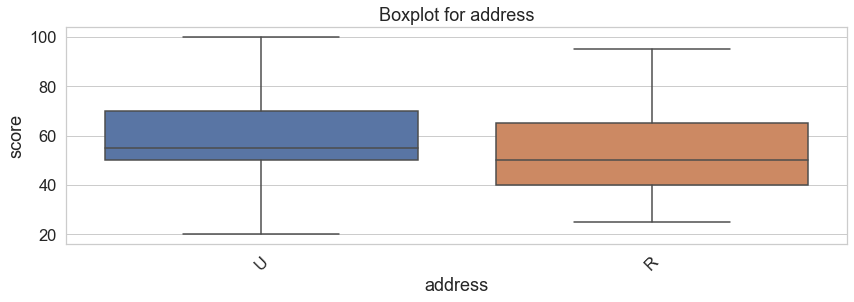

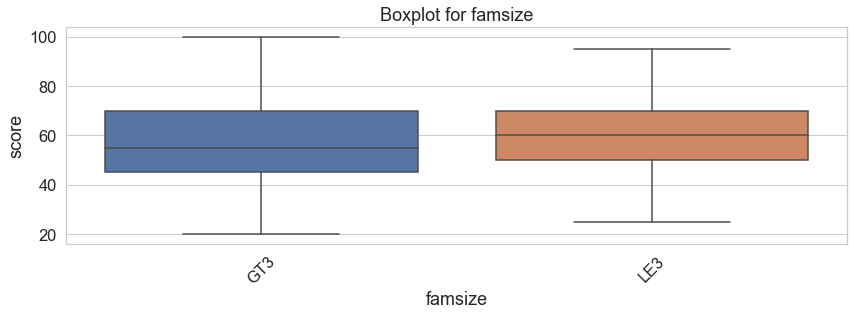

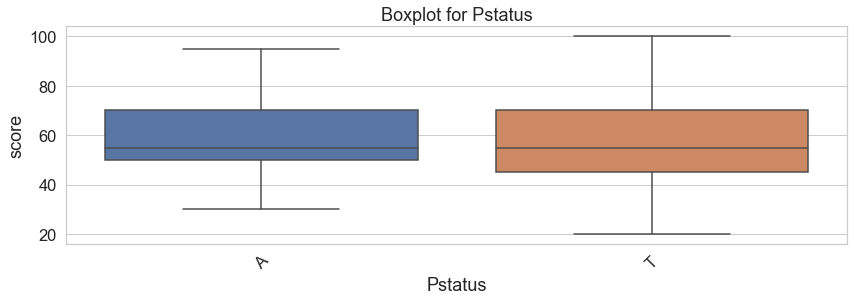

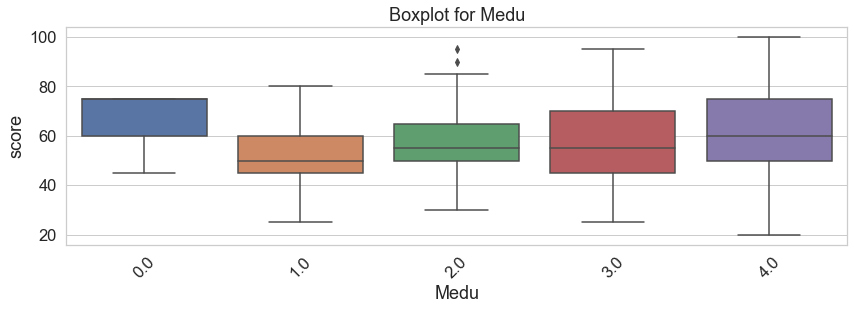

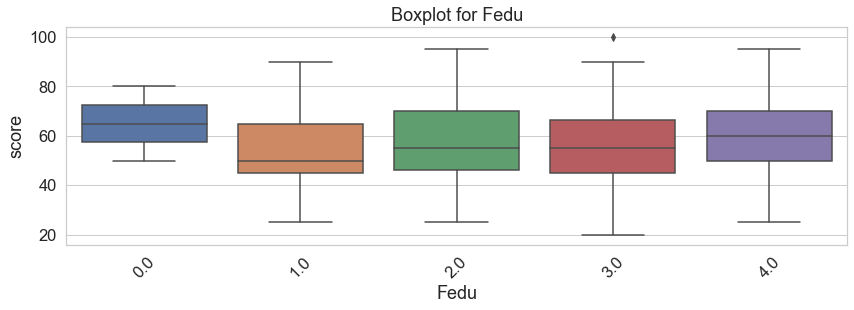

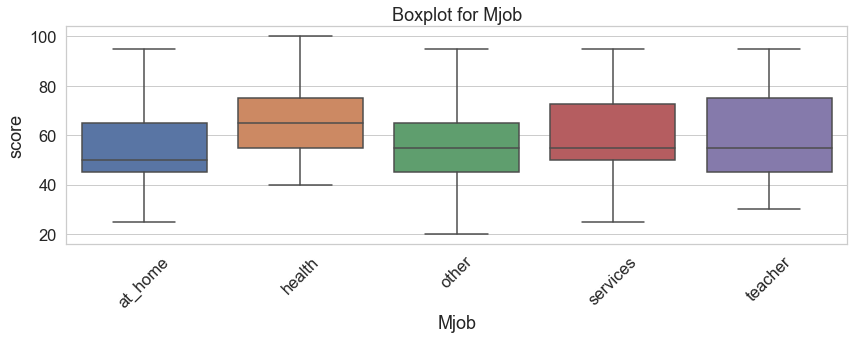

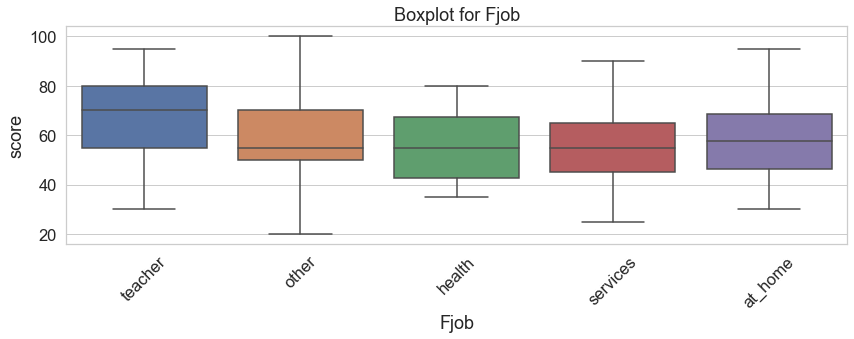

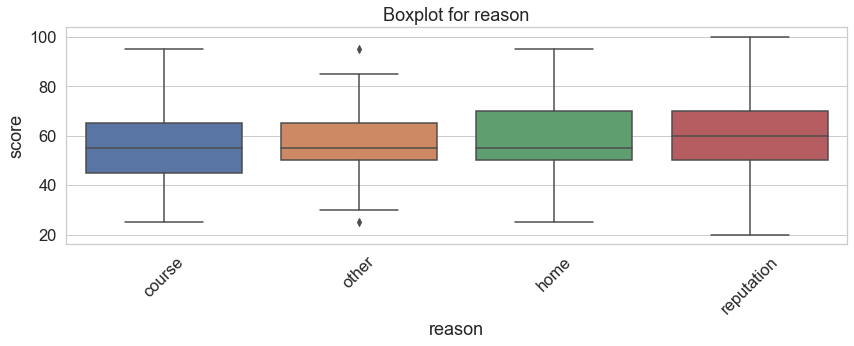

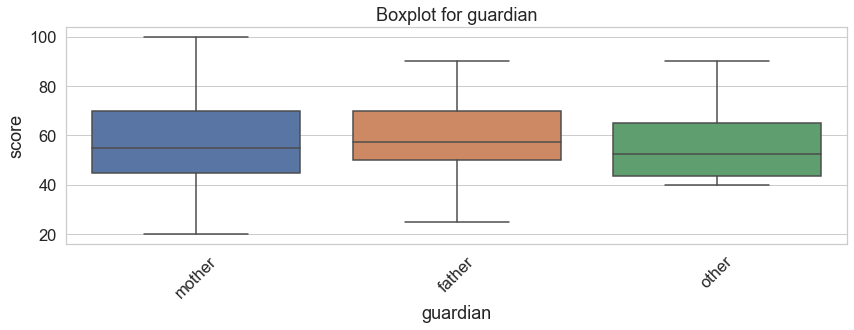

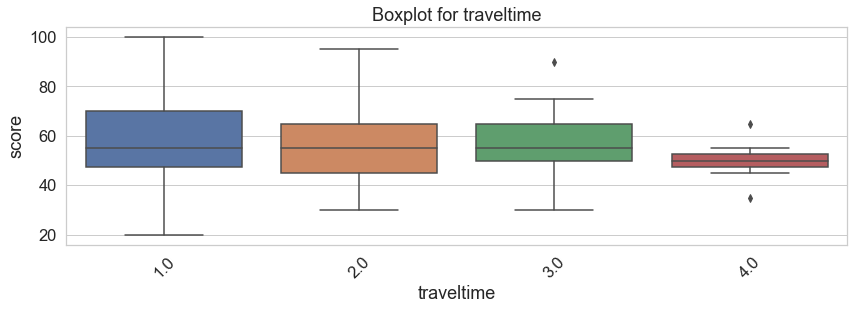

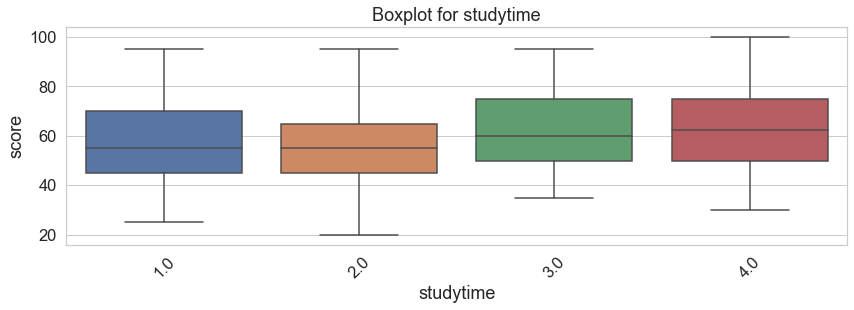

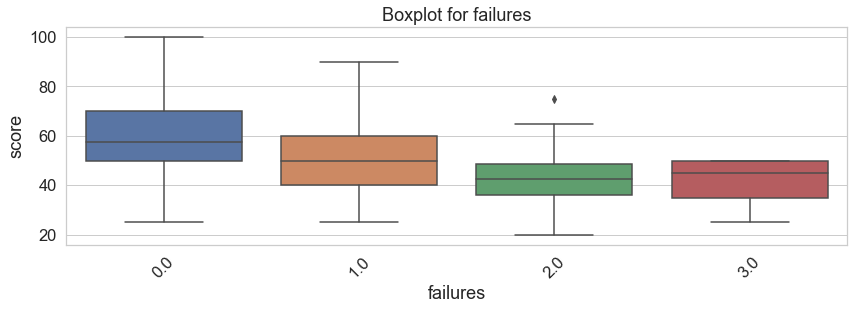

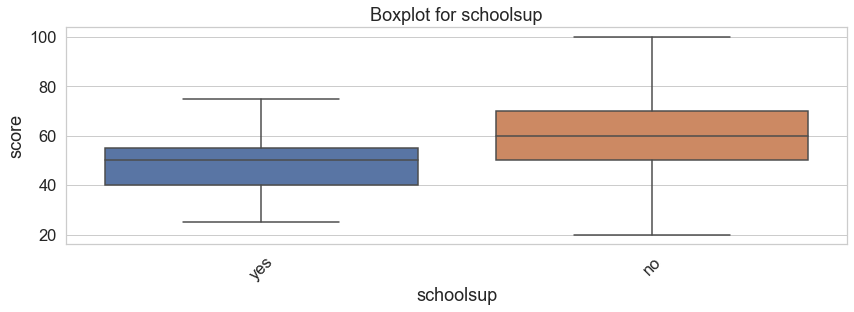

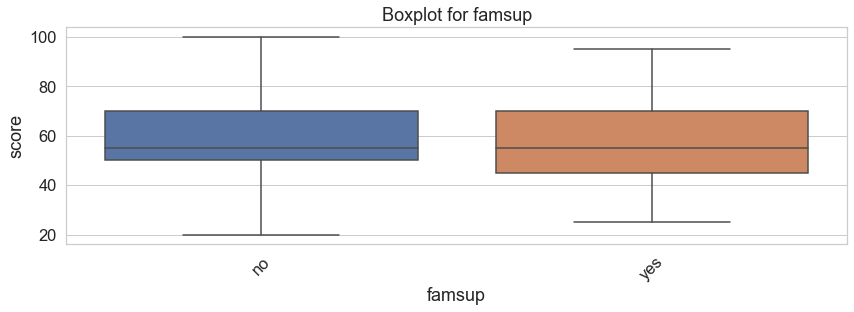

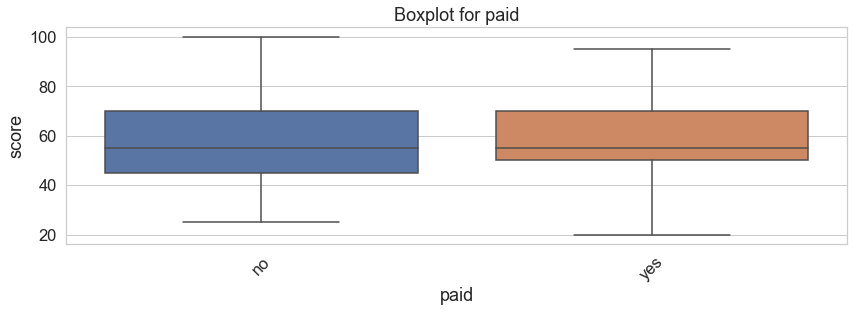

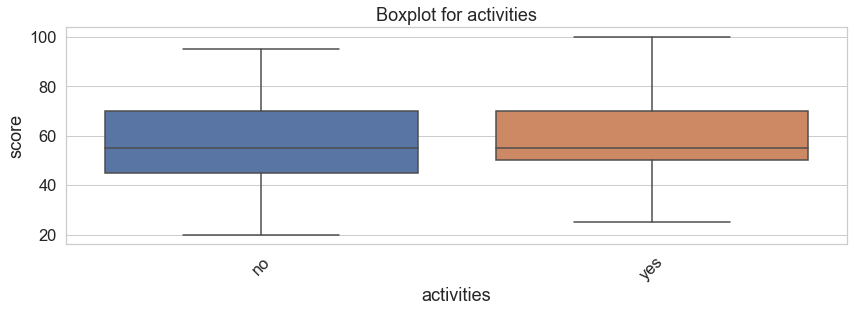

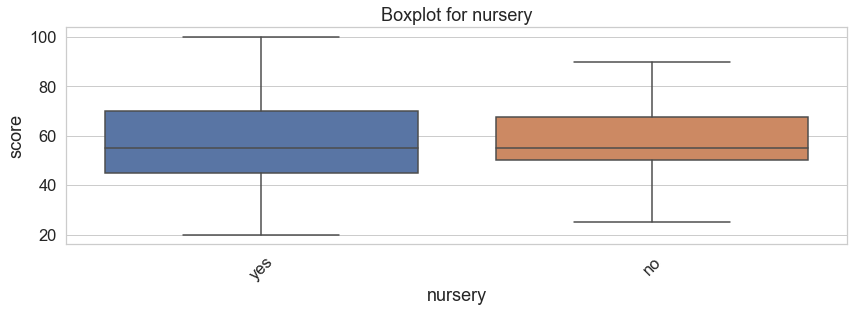

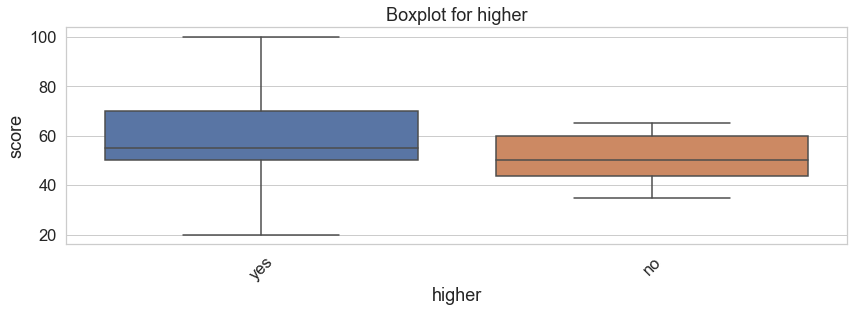

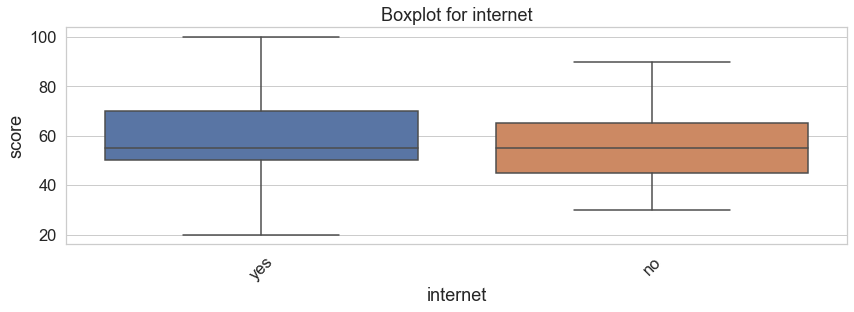

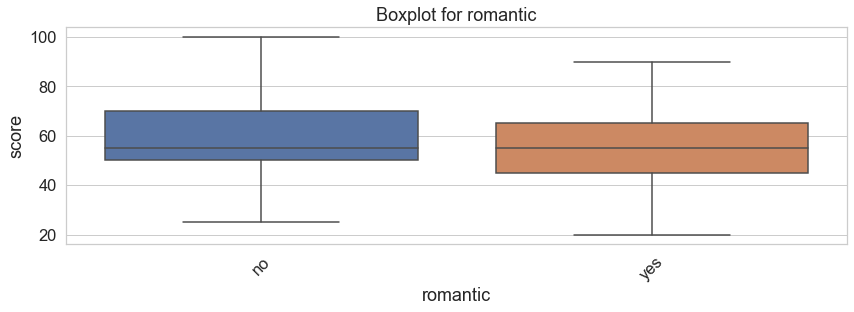

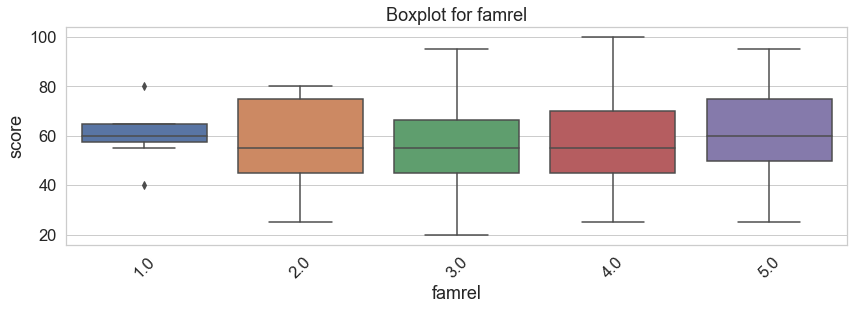

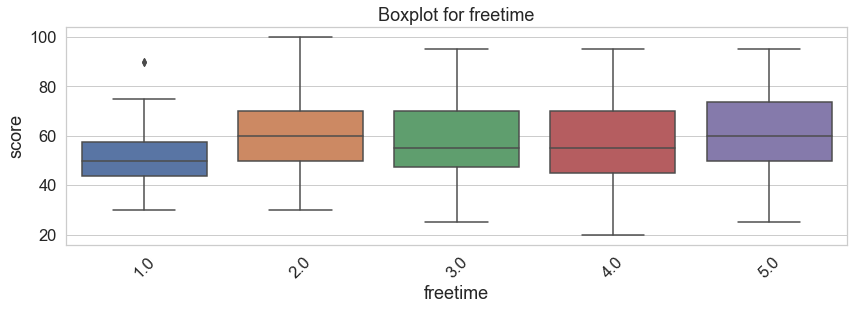

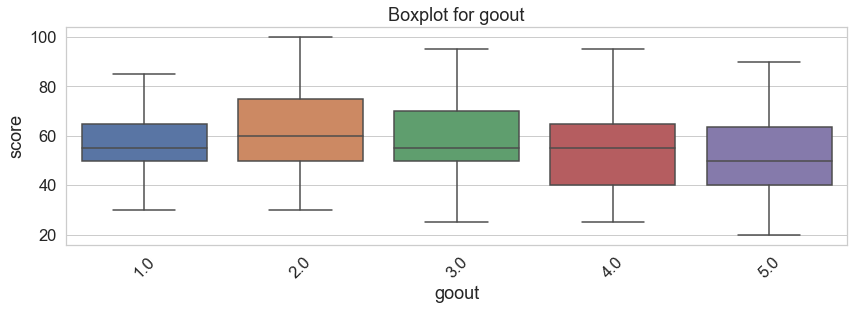

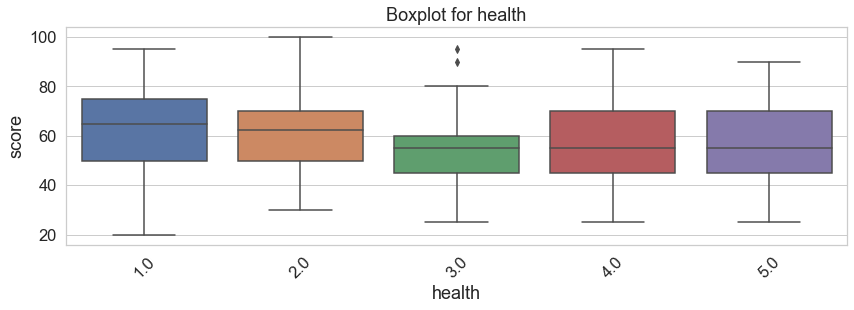

In [76]:
for col in colums:
    boxplot111(col)  # Выбросов практически нет

In [77]:
def get_stat_dif111(column):
    cols = df1.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df1.loc[df1.loc[:, column] == comb[0], 'score'],
                     df1.loc[df1.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [78]:
for col in colums:
    get_stat_dif111(col)  # Изменились параметры, которые предлагается использовать в дальнейшем для построения модели

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


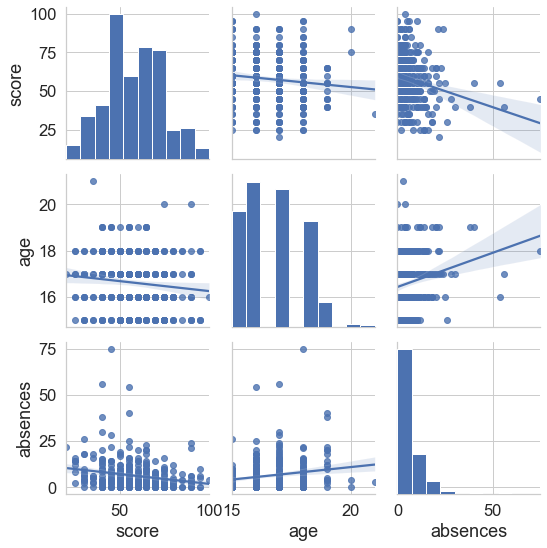

In [79]:
sns.pairplot(df1[['score', 'age', 'absences']], kind='reg')

In [80]:
df1[['score', 'age', 'absences']].corr()

,score,age,absences
score,1.000000,-0.114798,-0.211433
age,-0.114798,1.000000,0.200094
absences,-0.211433,0.200094,1.000000
